#Question 2


Company segment as per performance


In [250]:
#!pip install yellowbrick

In [251]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [252]:
import warnings
warnings.filterwarnings('ignore')

In [253]:
data_file = "/content/Q2_ratios.xlsx"

In [254]:
Pharma_df = pd.read_excel(data_file)

In [255]:
Pharma_df

,Company Type,Name,Current ratio,Debt to equity ratio,Inventory turnover Ratio,Operating Margin,ROE,Book value per share,Price earnings ratio (P/E),Market Cap to Sales,Asset turnaround,Divident payout ratio
0,Large,Sun Pharma.Inds.,2.669948,10.719585,1.12,0.282753,16.69,0.004576,43.470308,32.266702,0.58,33.82
1,Large,Divi's Lab.,6.942837,0.075472,1.16,0.317094,15.35,0.020687,76.087483,71.239739,0.58,36.28
2,Large,Cipla,4.239449,2.712915,1.64,0.258748,18.20,0.010213,22.976409,17.589611,0.79,24.51
3,Large,Torrent Pharma.,1.212915,18.483720,1.26,0.322067,24.23,0.026626,66.751124,39.128788,0.74,57.21
4,Large,Mankind Pharma,3.206544,5.178732,2.83,0.276678,19.71,0.030554,56.518014,45.525505,0.89,57.21
5,Large,Dr Reddy's Labs,1.919479,56.074341,1.48,0.261828,18.30,0.008564,18.159953,12.583842,0.74,11.80
6,Large,Lupin,1.874551,59.655826,1.31,0.232664,20.84,0.015778,28.775737,16.636778,0.86,16.70
7,Large,Zydus Lifesci.,2.272658,1.893638,1.93,0.295023,20.67,0.012597,23.532325,16.331390,0.72,7.82
8,Large,Aurobindo Pharma,1.828771,145.097280,1.47,0.207700,11.53,0.007181,22.182825,9.104650,0.69,8.31
9,Large,Abbott India,3.386259,9.255059,4.66,0.264403,35.66,0.084173,45.910702,40.529555,1.15,71.36


## Scaling

#### Rescaling the dataset

In [256]:
from sklearn.preprocessing import MinMaxScaler

In [257]:
# Select only the numerical columns for scaling
numerical_cols = Pharma_df.select_dtypes(include=np.number).columns.tolist()

# Exclude the 'S.No.' column
if 'S.No.' in numerical_cols:
    numerical_cols.remove('S.No.')

# Select the numerical data for scaling
Pharma_numerical_df = Pharma_df[numerical_cols]

# Apply the scaler to the numerical data
scaler = MinMaxScaler()
scaled_Pharma_df = scaler.fit_transform(Pharma_numerical_df)

# The scaled_Pharma_df is now a numpy array of the scaled numerical data.
# You might want to convert it back to a DataFrame with appropriate column names for better readability and further use.
scaled_Pharma_df = pd.DataFrame(scaled_Pharma_df, columns=numerical_cols)

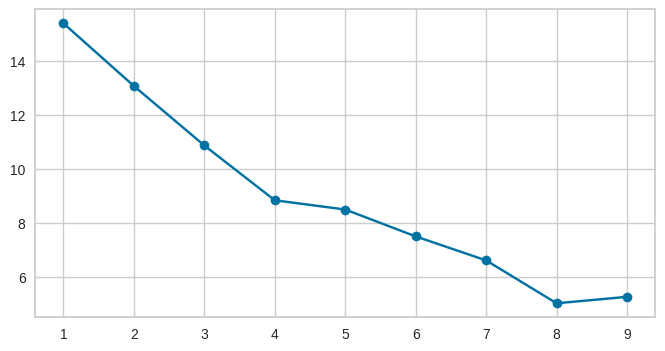

In [258]:
from sklearn.cluster import KMeans

cluster_range = range( 1, 10 )
cluster_errors = []

for num_clusters in cluster_range:
  clusters = KMeans( num_clusters )
  clusters.fit( scaled_Pharma_df )
  cluster_errors.append( clusters.inertia_ )

plt.figure(figsize=(8,4))
plt.plot( cluster_range, cluster_errors, marker = "o" );

#Inference
This plot shows a steep drop initially, then a flattening:

From k=1 to 2, inertia drops significantly.
From k=2 to 3/4, the drop slows.
Around k=4 or 5, the slope flattens, forming an "elbow"

#Conclusion
The "elbow" point is typically where adding more clusters doesn't significantly improve clustering.
In our plot, the elbow is likely around k = 4 or 5.
After that, the inertia reduction is minimal, so 4 or 5 clusters likely capture the natural structure of your data

#### Creating 4 Clusters

We will set k to 4 for running *KMeans* algorithm and create a new column *clusterid* in *Pharma_df*  to capture the cluster number it is assigned to.

In [259]:
k = 4

clusters = KMeans( k, random_state = 42 )
clusters.fit( scaled_Pharma_df )
Pharma_df["clusterid"] = clusters.labels_

In [260]:
clusters.labels_

array([0, 2, 0, 3, 3, 0, 0, 0, 0, 3, 0, 3, 0, 0, 0, 3, 0, 2, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 1, 3, 3, 0,
       0], dtype=int32)

## Evaluating the quality of cluster using Silhouette score

#### Cluster 0

In [261]:
Pharma_df[Pharma_df.clusterid == 0]

,Company Type,Name,Current ratio,Debt to equity ratio,Inventory turnover Ratio,Operating Margin,ROE,Book value per share,Price earnings ratio (P/E),Market Cap to Sales,Asset turnaround,Divident payout ratio,clusterid
0,Large,Sun Pharma.Inds.,2.669948,10.719585,1.12,0.282753,16.69,0.004576,43.470308,32.266702,0.58,33.82,0
2,Large,Cipla,4.239449,2.712915,1.64,0.258748,18.20,0.010213,22.976409,17.589611,0.79,24.51,0
5,Large,Dr Reddy's Labs,1.919479,56.074341,1.48,0.261828,18.30,0.008564,18.159953,12.583842,0.74,11.80,0
6,Large,Lupin,1.874551,59.655826,1.31,0.232664,20.84,0.015778,28.775737,16.636778,0.86,16.70,0
7,Large,Zydus Lifesci.,2.272658,1.893638,1.93,0.295023,20.67,0.012597,23.532325,16.331390,0.72,7.82,0
8,Large,Aurobindo Pharma,1.828771,145.097280,1.47,0.207700,11.53,0.007181,22.182825,9.104650,0.69,8.31,0
10,Large,Alkem Lab,2.663259,61.810958,1.94,0.197768,19.56,0.031013,34.762634,19.574162,0.86,26.63,0
12,Large,Glenmark Pharma.,1.465893,60.625443,1.86,0.174787,-50.87,-0.088674,171.635071,12.455236,0.27,14.81,0
13,Large,Biocon,1.136210,30.588039,1.05,0.207467,4.64,0.005862,-6.377302,10.679901,0.70,-4.70,0
14,Large,Ipca Labs.,2.371005,47.385889,1.38,0.185560,9.35,0.023098,64.561892,16.195798,0.78,18.54,0


#### Cluster 1

In [262]:
Pharma_df[Pharma_df.clusterid == 1]

,Company Type,Name,Current ratio,Debt to equity ratio,Inventory turnover Ratio,Operating Margin,ROE,Book value per share,Price earnings ratio (P/E),Market Cap to Sales,Asset turnaround,Divident payout ratio,clusterid
40,Small,Kilitch Drugs,2.086324,2.015547,27.0,0.12957,7.71,1.308443,47.79185,15.34583,0.76,7.74,1


#### Cluster 2

In [263]:
Pharma_df[Pharma_df.clusterid == 2]

,Company Type,Name,Current ratio,Debt to equity ratio,Inventory turnover Ratio,Operating Margin,ROE,Book value per share,Price earnings ratio (P/E),Market Cap to Sales,Asset turnaround,Divident payout ratio,clusterid
1,Large,Divi's Lab.,6.942837,0.075472,1.16,0.317094,15.35,0.020687,76.087483,71.239739,0.58,36.28,2
17,Medium,Suven Pharma,4.903208,1.549882,1.34,0.357648,14.11,0.150511,1564.057971,104.808439,0.60,20.35,2
22,Medium,Pfizer,5.051566,0.807432,1.87,0.314015,16.10,0.091717,160.480000,36.115846,0.53,29.04,2
28,Medium,Concord Biotech,6.595512,0.327916,1.59,0.413342,20.89,0.185606,21.242914,57.588512,0.66,7.79,2


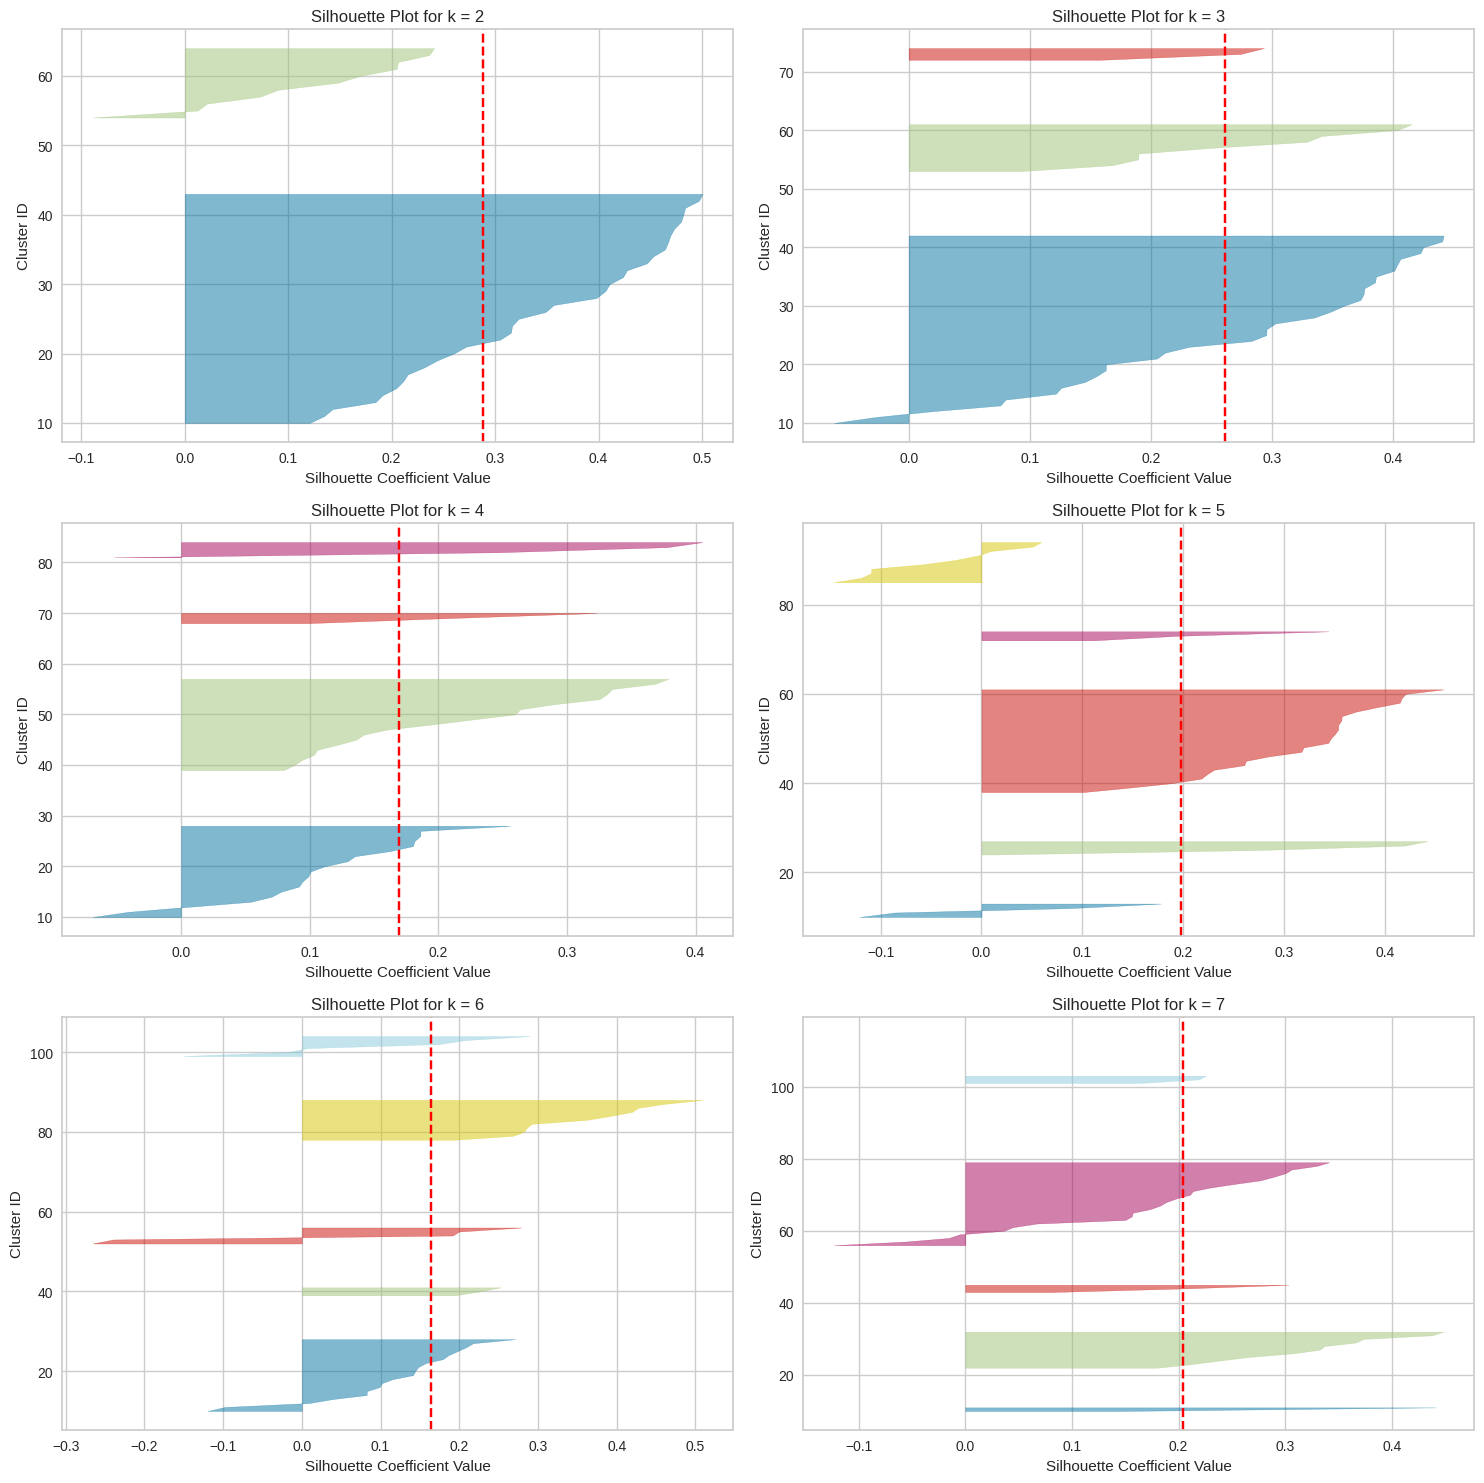

In [267]:
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import KMeans # Make sure KMeans is imported here

fig, ax = plt.subplots(3, 2, figsize=(15,15)) # Changed subplot grid to 3x2
num_clusters = [2, 3, 4, 5, 6, 7]
# Flatten the 2D array of axes for easier iteration
ax = ax.flatten()

for i, k in enumerate(num_clusters):
    km = KMeans(n_clusters=k,
                random_state=42, n_init=10)
    # Use the flattened ax array
    visualizer = SilhouetteVisualizer(km,
                                      colors='yellowbrick',
                                      ax=ax[i]) # Use the index 'i' for the flattened array
    visualizer.fit(scaled_Pharma_df)
    # Set axis labels and title using the current ax object
    ax[i].set_xlabel("Silhouette Coefficient Value")
    ax[i].set_ylabel("Cluster ID")
    ax[i].set_title(f"Silhouette Plot for k = {k}")

plt.tight_layout() # Add tight_layout for better spacing
plt.show() # Add plt.show() to display the plots

#inference
**X-axis: Silhouette Coefficient Value**:
Ranges from -1 to +1
+1 → well-clustered (tight and well-separated).
0 → on the boundary between clusters.
Negative → likely assigned to the wrong cluster.

**Y-axis: Cluster ID**:
Each horizontal band represents a different cluster.
Thickness of a band shows number of samples in that cluster.

**Red Dashed Line:** Average Silhouette Score
The closer to 1, the better the overall clustering.
Compare across different values of k (clusters).

**k = 2**

Average score ~0.30 → reasonably good.
Two well-separated clusters with clear widths.
Most values are positive, indicating good clustering.
Inference: Good cohesion and separation.

**k = 3**

Average ~0.28, slightly lower.
One cluster looks dominant, others are thinner but positive.
Small fraction of points near zero or slightly negative.
Inference: Still okay, but one large and possibly dominant cluster.

**k = 4**

Average ~0.22 → weaker than k=2/3.
Some clusters have points near 0 or negative.
Cluster separation is getting less distinct.
Inference: Clustering quality is deteriorating slightly.

**k = 5**

Average ~0.21, slightly worse.
Several clusters have significant negative silhouettes.
Possibly over-clustering (splitting good clusters unnecessarily).
Inference: Poorer cohesion and separation. Not ideal.



#Evaluating Cluster Performance

## Calculating Silhouette Score

In [268]:
from sklearn.metrics import silhouette_score

In [269]:
for k in [2, 3, 4, 5,6,7,8,9]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_Pharma_df)
    score = silhouette_score(scaled_Pharma_df, kmeans.labels_)
    print(f"k = {k}, silhouette_score = {score:.3f}")

k = 2, silhouette_score = 0.400
k = 3, silhouette_score = 0.281
k = 4, silhouette_score = 0.268
k = 5, silhouette_score = 0.127
k = 6, silhouette_score = 0.116
k = 7, silhouette_score = 0.157
k = 8, silhouette_score = 0.143
k = 9, silhouette_score = 0.134


#Conclusion

Best k appears to be 2 or 3 based on silhouette scores and clean separation.
k = 4 or 5 and avoce 6 starts to show poorer silhouette scores and more negative coefficients — indicating overfitting or forced grouping.

## Calinski-Harabasz Index
The Calinski-Harabasz Index evaluates cluster validity based on between-cluster dispersion (want high) and Within-cluster dispersion (want low). Basically higher the score better defined is the clusters



In [270]:
from sklearn.metrics import calinski_harabasz_score

In [271]:
cluster_range = range( 2, 6 )
ch_scores = []

for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, random_state = 42 )
  clusters.fit( scaled_Pharma_df )
  print(f"n_cluster: {num_clusters} - CH Score: {calinski_harabasz_score(scaled_Pharma_df, clusters.labels_)}" )

n_cluster: 2 - CH Score: 4.625938835107172
n_cluster: 3 - CH Score: 8.776602784354909
n_cluster: 4 - CH Score: 9.222695050361898
n_cluster: 5 - CH Score: 9.020921498267462


#Inference:
The highest CH score is at 2 clusters (4.625), indicating that 2 clusters offer the best balance of tightness and separation.

## Understanding Feature Contributions

In [272]:
x_features = ['Current ratio','Debt to equity ratio','Inventory turnover Ratio','Operating Margin', 'ROE', 'Book value per share','Price earnings ratio (P/E)','Market Cap to Sales','Asset turnaround','Divident payout ratio']
scaled_Pharma_df = pd.DataFrame(scaled_Pharma_df, columns = x_features)
scaled_Pharma_df

,Current ratio,Debt to equity ratio,Inventory turnover Ratio,Operating Margin,ROE,Book value per share,Price earnings ratio (P/E),Market Cap to Sales,Asset turnaround,Divident payout ratio
0,0.299427,0.053070,0.008049,0.677883,0.558901,0.061501,0.291285,0.304812,0.19375,0.175530
1,1.000000,0.000083,0.009582,0.762590,0.547816,0.061641,0.306487,0.678302,0.19375,0.186740
2,0.556759,0.013213,0.027980,0.618673,0.571393,0.061550,0.281733,0.164158,0.32500,0.133105
3,0.060536,0.091720,0.013415,0.774857,0.621277,0.061693,0.302135,0.370574,0.29375,0.282114
4,0.387407,0.025487,0.073591,0.662898,0.583885,0.061727,0.297366,0.431875,0.38750,0.282114
5,0.176382,0.278846,0.021847,0.626270,0.572220,0.061536,0.279488,0.116186,0.29375,0.075188
6,0.169016,0.296674,0.015332,0.554332,0.593233,0.061599,0.284436,0.155027,0.36875,0.097517
7,0.234289,0.009134,0.039095,0.708150,0.591827,0.061571,0.281992,0.152100,0.28125,0.057052
8,0.161510,0.722002,0.021464,0.492755,0.516214,0.061524,0.281363,0.082844,0.26250,0.059285
9,0.416872,0.045779,0.143733,0.632621,0.715834,0.062192,0.292422,0.383998,0.55000,0.346594


In [273]:
model = KMeans(n_clusters=5, random_state = 42)
model.fit(scaled_Pharma_df)

KMeans(n_clusters=5, random_state=42)

In [274]:
from sklearn.feature_selection import f_classif
import numpy as np

X = scaled_Pharma_df
y = model.labels_

f_scores, p_vals = f_classif(X, y)
importance = pd.Series(f_scores, index=X.columns).sort_values(ascending=False)
print(importance)

Current ratio                 32.556930
Inventory turnover Ratio      28.153196
Divident payout ratio         22.194856
Market Cap to Sales           12.122886
Operating Margin               8.636040
Price earnings ratio (P/E)     3.852217
Asset turnaround               2.938014
Debt to equity ratio           2.310192
ROE                            2.114814
Book value per share           0.136208
dtype: float64


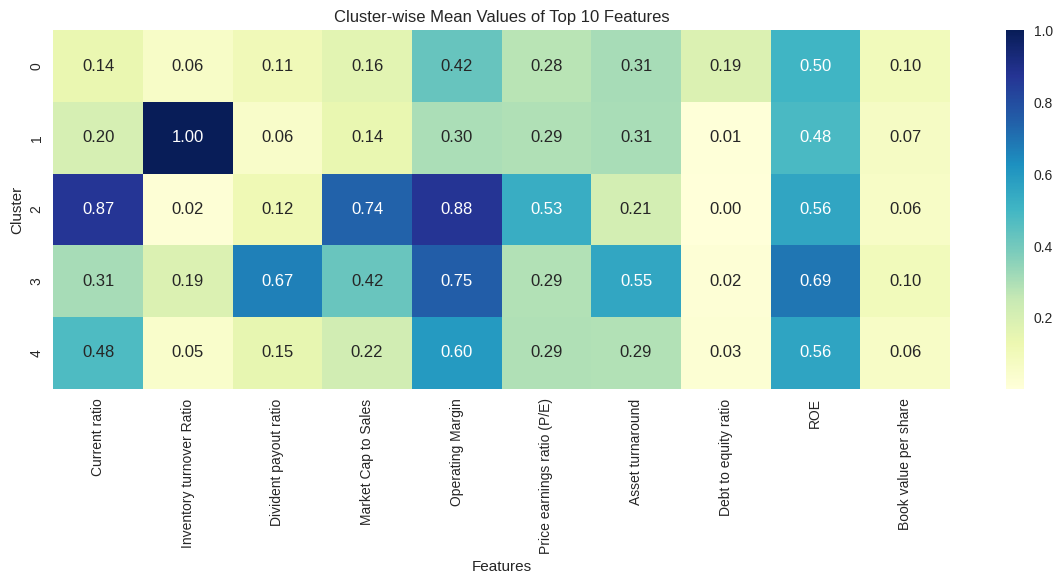

In [275]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Top 10 important features (based on your previous F-scores)
top_10_features = [
    'Current ratio',
    'Inventory turnover Ratio',
    'Divident payout ratio',
    'Market Cap to Sales',
    'Operating Margin',
    'Price earnings ratio (P/E)',
    'Asset turnaround',
    'Debt to equity ratio',
    'ROE',
    'Book value per share'
]

# Add cluster labels to the DataFrame
scaled_Pharma_df['Cluster'] = model.labels_

# Compute average values of top 10 features for each cluster
cluster_means = scaled_Pharma_df.groupby('Cluster')[top_10_features].mean()

# Create the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(cluster_means, annot=True, fmt=".2f", cmap='YlGnBu')
plt.title('Cluster-wise Mean Values of Top 10 Features')
plt.xlabel('Features')
plt.ylabel('Cluster')
plt.tight_layout()
plt.show()


#Inference:
As per the ANOVA F-score and the heat map the top 3 most important features for distinguishing our clusters are- Current ratio, Inventory turnover Ratio, and Divident payout ratio

#characteristics
We are using KDE plot shows the likelihood (density) of values across a continuous range to determine the characterisitics across all clusters using the top  features- Number of Equity Share, Current Assets (Q),Operating Profit (Q), Sales (q) and marketcapital

In [276]:
scaled_Pharma_df['clusterid'] = model.labels_

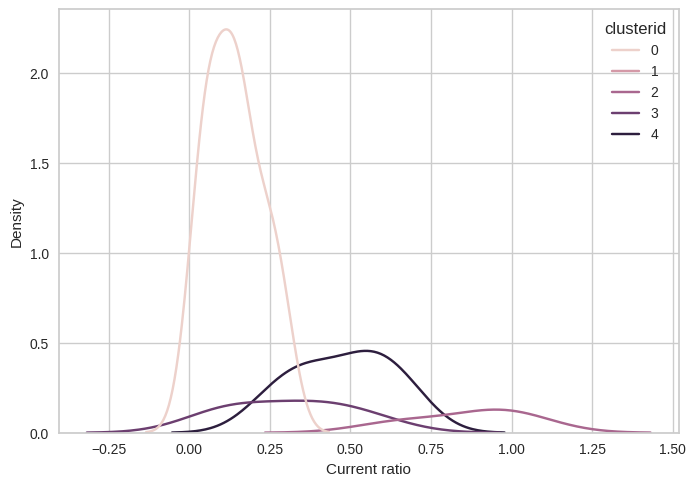

In [277]:
sn.kdeplot(scaled_Pharma_df,
            x = 'Current ratio',
            hue = 'clusterid');

#inference:
**Cluster 0**: These companies tend to have very low current ratios, signaling poor liquidity, yet they possess a large number of equity shares, suggesting they might be larger, more publicly floated firms—possibly facing financial strain or overextension despite their size.

**Clusters 1**:This cluster shows strong liquidity with current ratios close to or above 1 and includes firms with fewer equity shares, indicating tightly held or privately managed companies that are financially disciplined and operate conservatively.

**Cluster 2:**: Comprising companies with moderate liquidity and a mid-range equity share structure, this cluster likely includes balanced, growth-phase firms that are expanding while maintaining a reasonably sound financial footing.

**Cluster 3**: Characterized by slightly weaker liquidity and a low number of equity shares, this cluster likely consists of small, tightly controlled businesses—such as startups or family-run firms—operating on lean capital with limited access to public funds.

**Cluster 4**:his is a diverse cluster with a broad spread of current ratios, indicating variability in liquidity and a similar equity profile to Cluster 2. These firms may be in transition or undergoing structural shifts, such as capital restructuring, entry into new markets, or ownership changes.

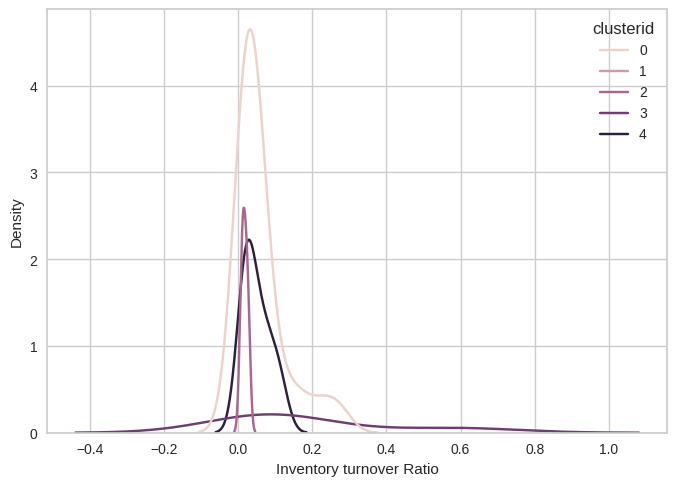

In [200]:
sn.kdeplot(scaled_Pharma_df,
            x = 'Inventory turnover Ratio',
            hue = 'clusterid');

#Inference
**Cluster 0:** Has the highest peak and is narrowly centered around a small positive value (~0.05).
Indicates low variability in inventory turnover and a consistent, moderate performance across entities in this cluster

**Cluster 1:**
Also sharply peaked but even more narrowly concentrated around ~0.
Indicates very low turnover or almost no inventory activity for this group.

**Cluster 2:**
Similarly peaked at ~0, but not as sharply as Cluster 1.
Slightly more spread, implying a small amount of turnover with minor variation.

**Cluster 3:**
Has a wider spread and a lower peak, centered close to 0 but extending more into the negative and positive ranges.
Suggests more variability and possibly some companies with negative or very low inventory turnover, which could indicate issues like obsolete inventory or returns.

**Cluster 4:**
Also has a moderate spread, slightly less than Cluster 3.
Distribution is a bit more centered around positive values, suggesting more consistent and healthy turnover than Cluster 3.


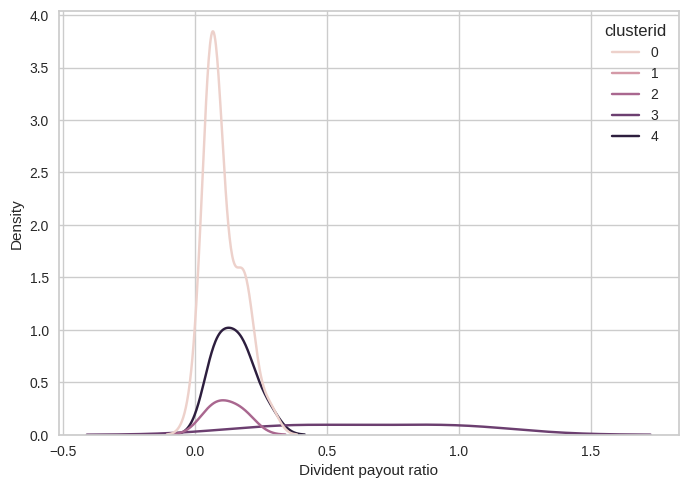

In [201]:
sn.kdeplot(scaled_Pharma_df,
            x = 'Divident payout ratio',
            hue = 'clusterid');

#Inference
**Cluster 1:** Narrow but less sharp than Cluster 0, also centered just above 0.
Indicates low but slightly more variable dividend payouts.
These might be transitional companies – not fully reinvesting but not prioritizing dividends either.

**Cluster 2:** Long-tailed distribution stretching up to 1.5.
Indicates high variability in dividend payouts.
Companies in this cluster are likely a mix of high and low dividend payers – possibly more mature or diverse in financial strategy.

**Cluster 3:** Fairly flat distribution with low density, spread across a wide range.
Suggests low frequency or inconsistent dividend behavior.
These might be irregular dividend payers, or companies that pay dividends under specific circumstances.

**Cluster 4:** Moderately peaked around 0.1–0.2, with a spread up to ~0.5.
Shows more consistent dividend payouts, but at moderate levels.
This cluster may represent stable, income-generating companies.

#Agglomerative clustering

In [202]:
from sklearn.cluster import AgglomerativeClustering


In [203]:
agcluster = AgglomerativeClustering(n_clusters = 2, linkage = 'ward')

In [204]:
agcluster.fit(scaled_Pharma_df)

AgglomerativeClustering()

In [205]:
agcluster.labels_

array([0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1])

In [206]:
Pharma_df['agcl_id'] = agcluster.labels_

In [207]:
Pharma_df.sort_values('agcl_id', ascending = True)

,Company Type,Name,Current ratio,Debt to equity ratio,Inventory turnover Ratio,Operating Margin,ROE,Book value per share,Price earnings ratio (P/E),Market Cap to Sales,Asset turnaround,Divident payout ratio,clusterid,agcl_id
0,Large,Sun Pharma.Inds.,2.669948,10.719585,1.12,0.282753,16.69,0.004576,43.470308,32.266702,0.58,33.82,0,0
1,Large,Divi's Lab.,6.942837,0.075472,1.16,0.317094,15.35,0.020687,76.087483,71.239739,0.58,36.28,1,0
2,Large,Cipla,4.239449,2.712915,1.64,0.258748,18.20,0.010213,22.976409,17.589611,0.79,24.51,0,0
4,Large,Mankind Pharma,3.206544,5.178732,2.83,0.276678,19.71,0.030554,56.518014,45.525505,0.89,57.21,2,0
7,Large,Zydus Lifesci.,2.272658,1.893638,1.93,0.295023,20.67,0.012597,23.532325,16.331390,0.72,7.82,0,0
15,Medium,Ajanta Pharma,3.624578,1.243319,1.37,0.270971,25.59,0.081270,35.336591,27.987444,1.02,38.44,2,0
11,Large,Glaxosmi. Pharma,1.789809,0.058733,2.76,0.314029,49.57,0.168411,51.663927,51.123506,0.98,142.46,2,0
9,Large,Abbott India,3.386259,9.255059,4.66,0.264403,35.66,0.084173,45.910702,40.529555,1.15,71.36,2,0
20,Medium,Gland Pharma,4.161890,19.819782,1.33,0.223434,9.26,0.028936,31.330490,16.902874,0.58,42.64,0,0
30,Small,Bliss GVS Pharma,4.813126,8.358634,3.39,0.156460,8.36,0.263951,15.048750,6.266533,0.64,12.25,0,0


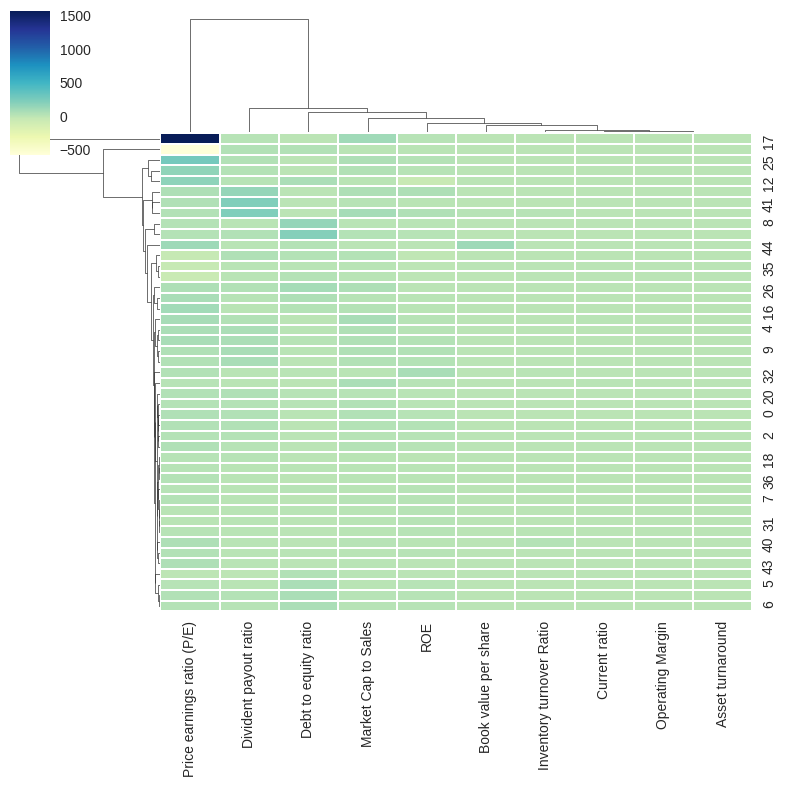

In [208]:
cmap = plt.cm.YlGnBu
sn.clustermap(
    Pharma_df.sort_values('agcl_id')
             .drop(['Company Type', 'Name','clusterid','agcl_id',], axis=1),
    cmap=cmap,
    linewidths=0.2,
    figsize=(8, 8)
)


#Inference

A hierarchical clustering heatmap is generated using seaborn.clustermap.

**Input Data:** Scaled financial indicators from pharmaceutical companies.

**Rows:** Companies (indexed by row number).

**Columns:** Financial metrics.

**Color Scale:**

**Blue:** High values

**Green:** Neutral/average values

**Yellow:** Low or negative value

#Observations

**1. Outlier Detection**:

A strong outlier is observed in the Price Earnings (P/E) Ratio.
A single or very few companies show extremely high P/E values (dark blue region).
These companies may be high-growth or overvalued relative to their earnings.

**2.Feature Groupings (Column Clustering)**

Cluster A: Dividend Payout Ratio, ROE, and Book Value per Share
Indicates a relationship between profitability and dividend policy.

Cluster B: Inventory Turnover Ratio, Current Ratio, and Operating Margin
Represents operational efficiency and liquidity metrics.

Cluster C: Asset Turnaround and Debt to Equity Ratio
Indicates financial structure and asset utilization similarity.

**3. Company Groupings (Row Clustering)**
Companies are grouped into several clusters based on financial similarity.
Each cluster likely represents a specific financial strategy or business model, such as:
Cash-rich dividend payers
Growth-stage firms with high P/E and low dividends
Operationally efficient companies with strong liquidity

**4. Homogeneity Across Companies**
The heatmap is largely green, indicating that most companies have average scaled values across most financial metrics.
However, few distinct rows (companies) deviate with extreme values, providing insight into potential market leaders, laggards, or niche firms.

#Density Based Clustering


We will be using DBSCAN to determine if there are any outliners.

In [227]:
from sklearn.cluster import HDBSCAN

In [240]:
hscan = HDBSCAN(min_cluster_size=2)

In [241]:
hscan.fit(scaled_Pharma_df[x_features])

HDBSCAN(min_cluster_size=2)

In [242]:
hscan.labels_

array([ 3,  0,  7, -1, -1,  2,  2,  3, -1, -1,  2, -1, -1,  9,  2,  6,  9,
       -1, -1,  6,  7, -1, -1,  8, -1, -1, -1, -1,  0,  3,  1,  1, -1, -1,
        5,  8,  4,  8,  5, -1, -1, -1, -1,  4, -1])

In [243]:
Pharma_df['hscan_cluster'] = hscan.labels_

In [244]:
Pharma_df[Pharma_df.hscan_cluster == 0]

,Company Type,Name,Current ratio,Debt to equity ratio,Inventory turnover Ratio,Operating Margin,ROE,Book value per share,Price earnings ratio (P/E),Market Cap to Sales,Asset turnaround,Divident payout ratio,clusterid,hscan_cluster
1,Large,Divi's Lab.,6.942837,0.075472,1.16,0.317094,15.35,0.020687,76.087483,71.239739,0.58,36.28,1,0
28,Medium,Concord Biotech,6.595512,0.327916,1.59,0.413342,20.89,0.185606,21.242914,57.588512,0.66,7.79,1,0


In [245]:
Pharma_df[Pharma_df.hscan_cluster == 1]

,Company Type,Name,Current ratio,Debt to equity ratio,Inventory turnover Ratio,Operating Margin,ROE,Book value per share,Price earnings ratio (P/E),Market Cap to Sales,Asset turnaround,Divident payout ratio,clusterid,hscan_cluster
30,Small,Bliss GVS Pharma,4.813126,8.358634,3.39,0.156460,8.36,0.263951,15.048750,6.266533,0.64,12.25,0,1
31,Small,Lincoln Pharma.,4.343491,0.067898,3.94,0.155908,16.84,0.723057,12.869257,8.037622,0.61,12.25,0,1


In [246]:
Pharma_df[Pharma_df.hscan_cluster == 2]

,Company Type,Name,Current ratio,Debt to equity ratio,Inventory turnover Ratio,Operating Margin,ROE,Book value per share,Price earnings ratio (P/E),Market Cap to Sales,Asset turnaround,Divident payout ratio,clusterid,hscan_cluster
5,Large,Dr Reddy's Labs,1.919479,56.074341,1.48,0.261828,18.30,0.008564,18.159953,12.583842,0.74,11.80,0,2
6,Large,Lupin,1.874551,59.655826,1.31,0.232664,20.84,0.015778,28.775737,16.636778,0.86,16.70,0,2
10,Large,Alkem Lab,2.663259,61.810958,1.94,0.197768,19.56,0.031013,34.762634,19.574162,0.86,26.63,0,2
14,Large,Ipca Labs.,2.371005,47.385889,1.38,0.185560,9.35,0.023098,64.561892,16.195798,0.78,18.54,0,2


In [247]:
Pharma_df[Pharma_df.hscan_cluster == -1]

,Company Type,Name,Current ratio,Debt to equity ratio,Inventory turnover Ratio,Operating Margin,ROE,Book value per share,Price earnings ratio (P/E),Market Cap to Sales,Asset turnaround,Divident payout ratio,clusterid,hscan_cluster
3,Large,Torrent Pharma.,1.212915,18.483720,1.26,0.322067,24.23,0.026626,66.751124,39.128788,0.74,57.21,2,-1
4,Large,Mankind Pharma,3.206544,5.178732,2.83,0.276678,19.71,0.030554,56.518014,45.525505,0.89,57.21,2,-1
8,Large,Aurobindo Pharma,1.828771,145.097280,1.47,0.207700,11.53,0.007181,22.182825,9.104650,0.69,8.31,0,-1
9,Large,Abbott India,3.386259,9.255059,4.66,0.264403,35.66,0.084173,45.910702,40.529555,1.15,71.36,2,-1
11,Large,Glaxosmi. Pharma,1.789809,0.058733,2.76,0.314029,49.57,0.168411,51.663927,51.123506,0.98,142.46,2,-1
12,Large,Glenmark Pharma.,1.465893,60.625443,1.86,0.174787,-50.87,-0.088674,171.635071,12.455236,0.27,14.81,0,-1
17,Medium,Suven Pharma,4.903208,1.549882,1.34,0.357648,14.11,0.150511,1564.057971,104.808439,0.60,20.35,1,-1
18,Medium,Piramal Pharma,1.539186,3.667059,1.44,0.157885,1.14,0.003156,17.361864,11.871955,0.50,20.35,0,-1
21,Medium,Wockhardt,0.843697,28.925926,1.96,0.090940,-12.10,-0.179259,-44.082174,29.123718,0.37,42.64,0,-1
22,Medium,Pfizer,5.051566,0.807432,1.87,0.314015,16.10,0.091717,160.480000,36.115846,0.53,29.04,1,-1


#inference:
Inference:
All companies being labeled -1 in HDBSCAN means they were seen as too unique or isolated to form any meaningful dense cluster. We have not encountered any notable outliners and input provided as per K means can be accepted
